In [1]:
### 2 - Loading dataset
import pandas as pd

# Load the dataset.
url = r'sunspots.csv' # Where filedirectory is the location, you store d your CSV file.

df = pd.read_csv(url)

# Display the first few rows to understand the structure
print(df.head())
print("\nColumn names:", df.columns.tolist())


# Load only date and sunspots columns
sunspots = df.loc[:, ('Date','Sunspots')]
print(sunspots.head())

# Date Parsing: Using pd.to_datetime
sunspots['Date'] = pd.to_datetime(sunspots['Date'], format='mixed')
print(sunspots.head())

   Unnamed: 0        Date  Year  DayOfYear  DayOfWeek  Week  Sunspots  Std  \
0           0  1818-01-01  1818          1          3     1        -1 -1.0   
1           1  1818-01-02  1818          2          4     1        -1 -1.0   
2           2  1818-01-03  1818          3          5     1        -1 -1.0   
3           3  1818-01-04  1818          4          6     1        -1 -1.0   
4           4  1818-01-05  1818          5          0     2        -1 -1.0   

   Observations  Provisional  
0             0            1  
1             0            1  
2             0            1  
3             0            1  
4             0            1  

Column names: ['Unnamed: 0', 'Date', 'Year', 'DayOfYear', 'DayOfWeek', 'Week', 'Sunspots', 'Std', 'Observations', 'Provisional']
         Date  Sunspots
0  1818-01-01        -1
1  1818-01-02        -1
2  1818-01-03        -1
3  1818-01-04        -1
4  1818-01-05        -1
        Date  Sunspots
0 1818-01-01        -1
1 1818-01-02        -1
2 

In [2]:
### 3 - Handling Time Series Data:
##### 3.1 - Select a specific date range for the year 1990 using pd.date_range and set the 'Date' column as the index using set_index.

# Generate a range of dates from January 1, 1990 to January 10, 1990
date_range = pd.date_range(start='1990-01-01', end='1990-01-10')

# Set the 'Date' column as the index using set_index
sunspots.set_index('Date', inplace=True)

print(sunspots.head())

            Sunspots
Date                
1818-01-01        -1
1818-01-02        -1
1818-01-03        -1
1818-01-04        -1
1818-01-05        -1


In [ ]:
### 3.2 - Resampling (o be conducted with data generated from 1):

### Downsampling: Using resample, calculate the monthly mean of year_1990 sunspots
 #(Hint: resample parameter should be ‘M’, and you are using the mean() function)
df_monthly = sunspots.resample('M').mean()

print("\nDownsampled Data (Monthly mean):")
print(df_monthly.head())
### Upsampling: Using resample, calculate the daily forward fill of year_1990 sunspots
# (Hint: resample parameter should be ‘D’, and you are using the ffill() function)
df_daily = df_monthly.resample('D').ffill()

print("\nUpsampled Data (Daily forward fill):")
print(df_daily.head())




Downsampled Data (Monthly mean):
             Sunspots
Date                 
1818-01-31  14.258065
1818-02-28  18.214286
1818-03-31  18.580645
1818-04-30  39.966667
1818-05-31  71.161290

Upsampled Data (Daily forward fill):
             Sunspots
Date                 
1818-01-31  14.258065
1818-02-01  14.258065
1818-02-02  14.258065
1818-02-03  14.258065
1818-02-04  14.258065


/tmp/ipython-input-503965410.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = sunspots.resample('M').mean()


In [3]:
### 3.3 - Moving window functions(To conducted with data generated from 1):
## Create a new column ‘Rolling_Mean’, calculating the 30-day rolling average of sunspots counts
sunspots['Rolling_Mean'] = sunspots['Sunspots'].rolling(window=30).mean()

##  Create a new column ‘Expanding_Mean’, calculating the cumulative expanding average of sunspots counts
sunspots['Expanding_Mean'] = sunspots['Sunspots'].expanding().mean()

##  Print the top 10 records of sunspots counts, rolling mean and expanding mean columns.
print("\nDataFrame with Rolling Mean and Expanding Sum:")
print(sunspots[['Sunspots', 'Rolling_Mean', 'Expanding_Mean']].head(10))



DataFrame with Rolling Mean and Expanding Sum:
            Sunspots  Rolling_Mean  Expanding_Mean
Date                                              
1818-01-01        -1           NaN       -1.000000
1818-01-02        -1           NaN       -1.000000
1818-01-03        -1           NaN       -1.000000
1818-01-04        -1           NaN       -1.000000
1818-01-05        -1           NaN       -1.000000
1818-01-06        -1           NaN       -1.000000
1818-01-07        -1           NaN       -1.000000
1818-01-08        65           NaN        7.250000
1818-01-09        -1           NaN        6.333333
1818-01-10        -1           NaN        5.600000


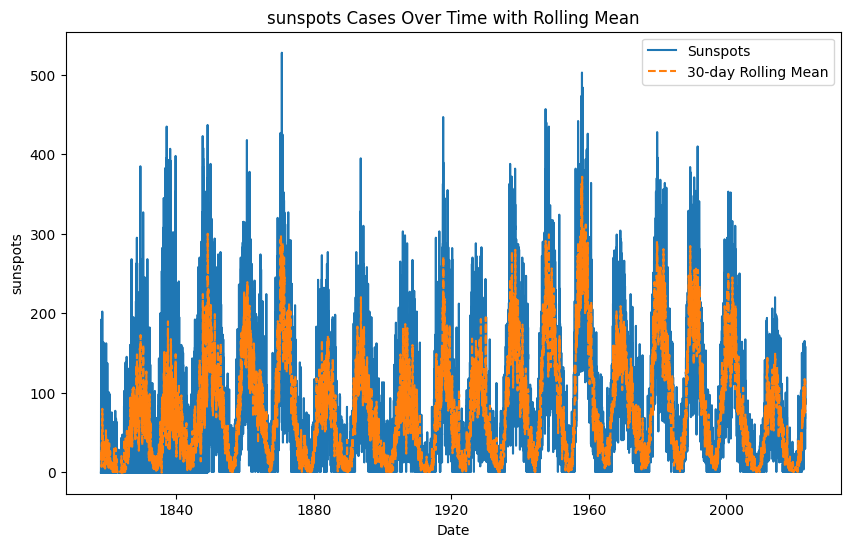

In [4]:
### 3.4 - Visualizing Time series data using Matplotlib: Using line plots, plot index column against sunspots and rolling mean. (Hint: check the lab example)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.figure(figsize=(10, 6))
plt.plot(sunspots.index, sunspots['Sunspots'], label='Sunspots')
plt.plot(sunspots.index, sunspots['Rolling_Mean'], label='30-day Rolling Mean', linestyle='--')
plt.title('sunspots Cases Over Time with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('sunspots')
plt.legend()
plt.show()

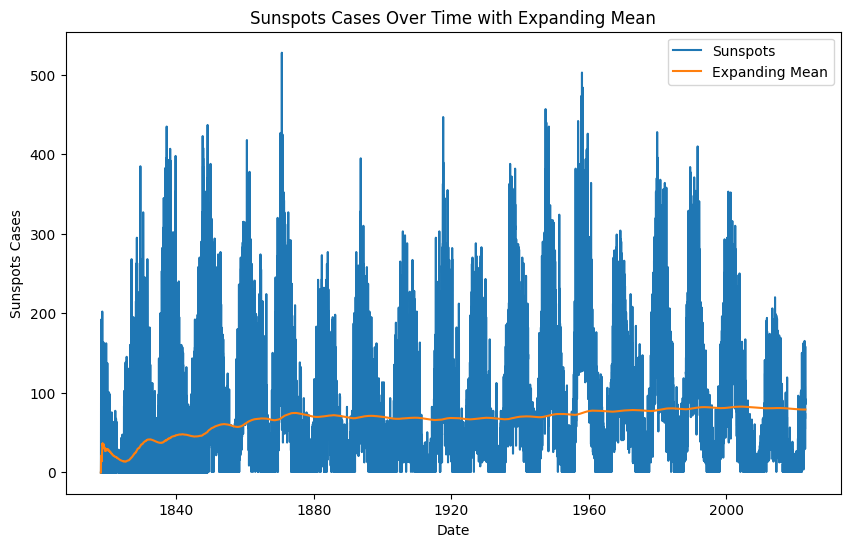

In [5]:
#### 3.5 - Visualizing Time series data using Seaborn: Using line plots, plot index column against sunspots and expanding mean. (Hint: check the lab example)
plt.figure(figsize=(10, 6))
sns.lineplot(x=sunspots.index, y='Sunspots', data=sunspots, label='Sunspots')
sns.lineplot(x=sunspots.index, y='Expanding_Mean', data=sunspots, label='Expanding Mean')
plt.title('Sunspots Cases Over Time with Expanding Mean')
plt.xlabel('Date')
plt.ylabel('Sunspots Cases')
plt.legend()
plt.show()

In [6]:
#### 3.6 - Visualizing Time series data using Plotly: Creating subplots of 3 rows and 1 column, (Hint: check the lab example)

# Plot using Plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=3, cols=1)

### plot a line plot of the index column and sunspots.
fig.add_trace(
    go.Scatter(x=sunspots.index, y=sunspots['Sunspots'], name='Sunspots'),
    row=1, col=1)

### plot a line plot of the index column and rolling mean.
fig.add_trace(
    go.Scatter(x=sunspots.index, y=sunspots['Rolling_Mean'], name='Rolling Mean',
               line=dict(color='red')),
    row=2, col=1)

### plot a line plot of the index column and expanding mean.
fig.add_trace(
    go.Scatter(x=sunspots.index, y=sunspots['Expanding_Mean'], name='Expanding Mean',
               line=dict(color='green')),
    row=3, col=1)

fig.update_layout(title_text="Subplots with Plotly")
fig.show()


Output hidden; open in https://colab.research.google.com to view.